### Practical Part

#### 2a)

PCA Explained Variance: 0.47
LDA Classification Accuracy: 0.77
ICA Kurtosis: [-0.67164656 -1.28229115]


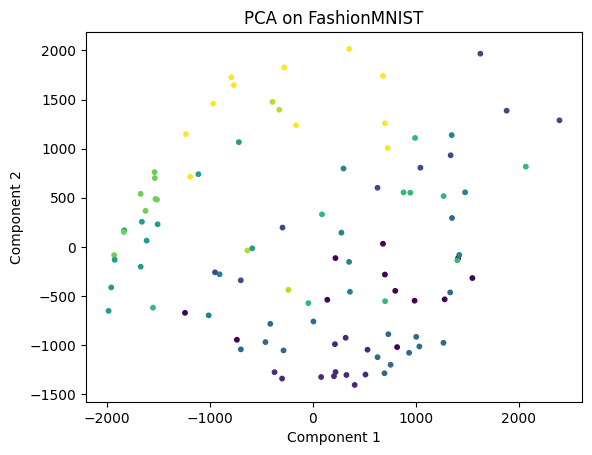

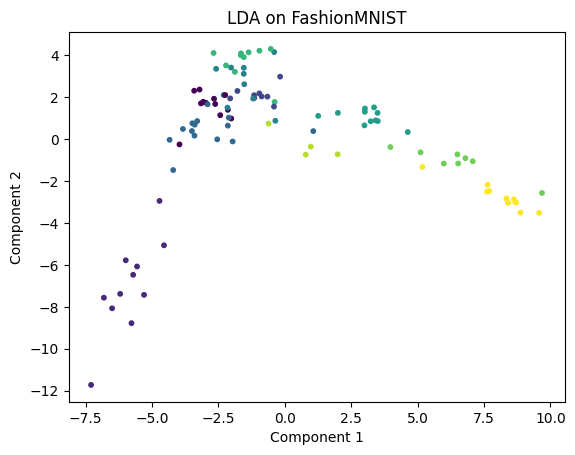

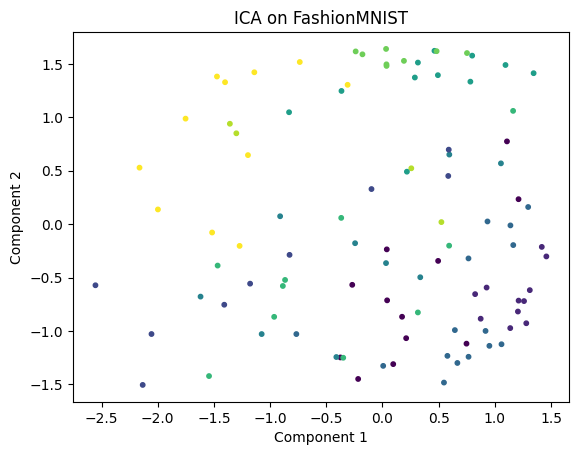

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml
from sklearn.metrics import explained_variance_score, accuracy_score
from scipy.stats import kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Get FashionMNIST data
fashion_mnist = fetch_openml('Fashion-MNIST')
X, y = fashion_mnist['data'], fashion_mnist['target']

# Use only 100 samples
X = X[:100]
y = y[:100]

# Perform PCA, LDA and ICA
pca = PCA(n_components=2, random_state=69)
X_pca = pca.fit_transform(X)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

ica = FastICA(n_components=2, random_state=69)
X_ica = ica.fit_transform(X)

# Evaluation Metrics

# 1. PCA - Explained Variance
pca_explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"PCA Explained Variance: {pca_explained_variance:.2f}")

# 2. LDA - Classification Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=69)
clf = LogisticRegression()
clf.fit(X_train, y_train)
lda_accuracy = clf.score(X_test, y_test)
print(f"LDA Classification Accuracy: {lda_accuracy:.2f}")

# 3. ICA - Kurtosis
ica_kurtosis = kurtosis(X_ica, axis=0)
print(f"ICA Kurtosis: {ica_kurtosis}")

# Plot the results
models = {"PCA": X_pca, "LDA": X_lda, "ICA": X_ica}
for key, value in models.items():
    plt.scatter(value[:, 0], value[:, 1], c=y.astype(int), s=10)
    plt.title(f"{key} on FashionMNIST")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

#### 2b)

--- Results for Fashion-MNIST ---
PCA Explained Variance: 0.38
LDA Classification Accuracy: 0.77
ICA Mean Kurtosis: -0.84


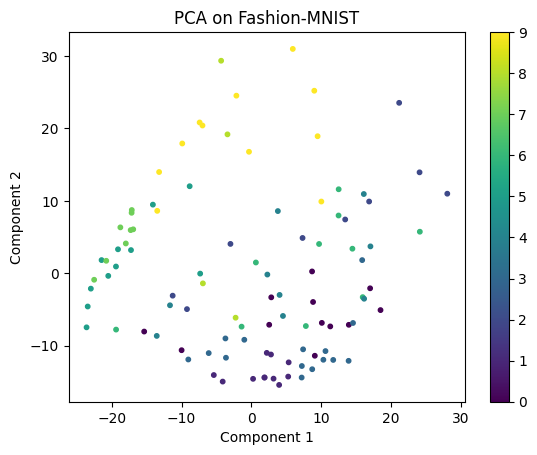

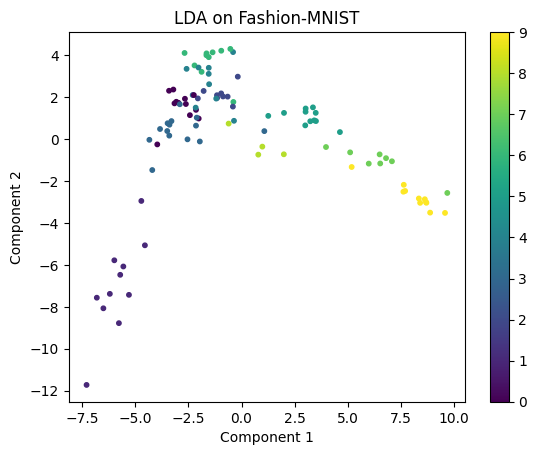

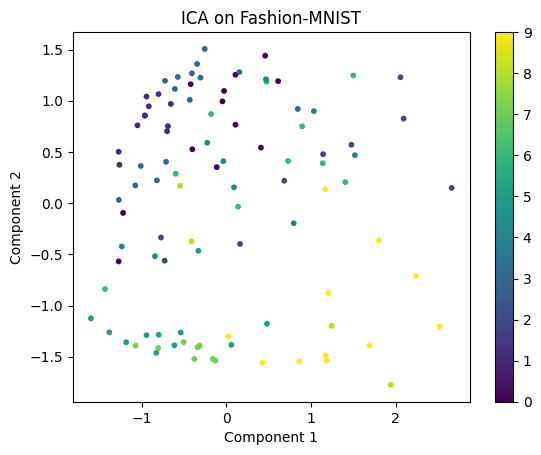

--- Results for Digits ---
PCA Explained Variance: 0.22
LDA Classification Accuracy: 0.68
ICA Mean Kurtosis: 0.06


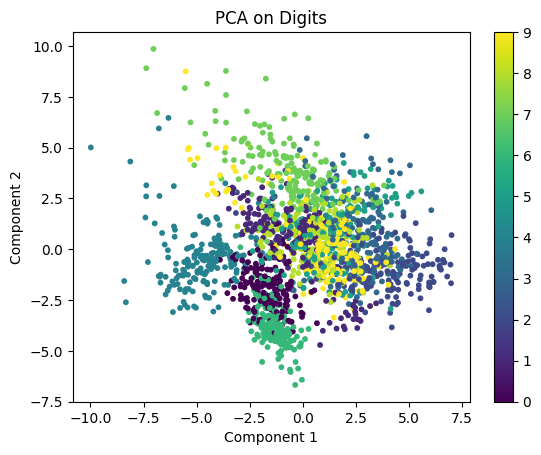

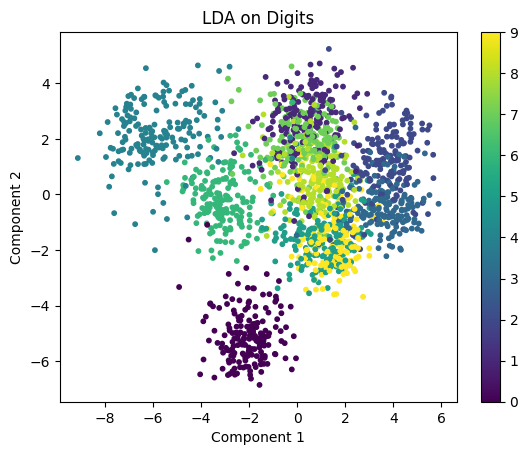

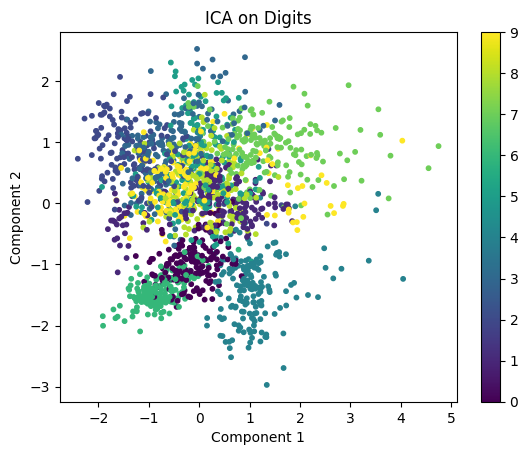

--- Results for Wine ---
PCA Explained Variance: 0.55
LDA Classification Accuracy: 1.00
ICA Mean Kurtosis: -1.11


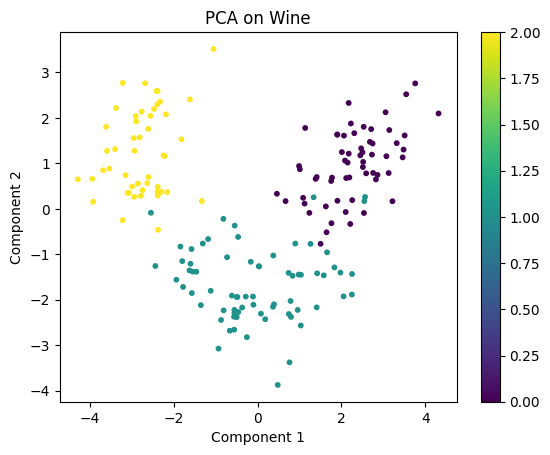

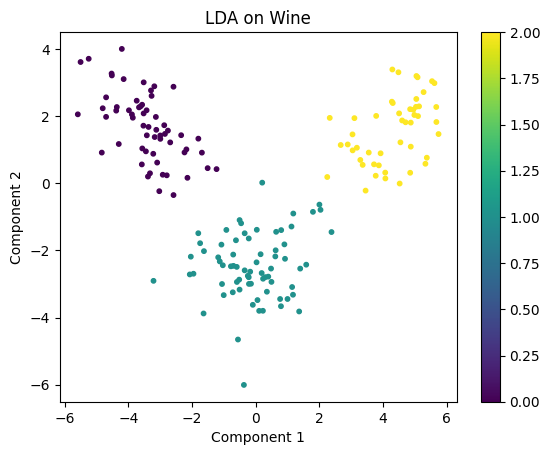

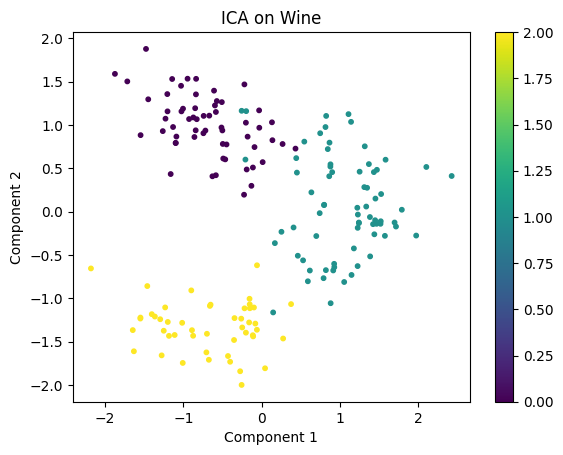

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml, load_digits, load_wine
from sklearn.metrics import accuracy_score
from scipy.stats import kurtosis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to perform and evaluate dimensionality reduction techniques
def evaluate_dimensionality_reduction(X, y, dataset_name):
    print(f"--- Results for {dataset_name} ---")

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA
    pca = PCA(n_components=2, random_state=69)
    X_pca = pca.fit_transform(X_scaled)
    pca_explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"PCA Explained Variance: {pca_explained_variance:.2f}")

    # Perform LDA
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X_scaled, y)
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=69)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    lda_accuracy = clf.score(X_test, y_test)
    print(f"LDA Classification Accuracy: {lda_accuracy:.2f}")

    # Perform ICA
    ica = FastICA(n_components=2, random_state=69)
    X_ica = ica.fit_transform(X_scaled)
    ica_kurtosis = kurtosis(X_ica, axis=0)
    ica_kurtosis_mean = np.mean(ica_kurtosis)
    print(f"ICA Mean Kurtosis: {ica_kurtosis_mean:.2f}")

    # Plot the results
    models = {"PCA": X_pca, "LDA": X_lda, "ICA": X_ica}
    for key, value in models.items():
        plt.figure()
        plt.scatter(value[:, 0], value[:, 1], c=y.astype(int), cmap='viridis', s=10)
        plt.title(f"{key} on {dataset_name}")
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.colorbar()
        plt.show()

# Load the datasets
# 1. Fashion-MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST')
X, y = fashion_mnist['data'], fashion_mnist['target']
X = X[:100]
y = y[:100]
evaluate_dimensionality_reduction(X, y, "Fashion-MNIST")

# 2. Digits dataset
digits = load_digits()
X_digits, y_digits = digits.data, digits.target
evaluate_dimensionality_reduction(X_digits, y_digits, "Digits")

# 3. Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target
evaluate_dimensionality_reduction(X_wine, y_wine, "Wine")
